Sobel operator

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
X  = np.array([[-1,0,1],
              [-2,0,2],
              [-1,0,1]])

Y=  np.array([[-1,-2,1],
              [0,0,0],
              [1,2,1]])

In [3]:
def filter_image(img):
    if len(img.shape)==3:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ROWS,COLS=img.shape

    sobel_imgx=np.zeros((ROWS,COLS))
    sobel_imgy=np.zeros((ROWS,COLS))

    for i in range(1,ROWS-1):
        for j in range(1,COLS-1):
          region = img[i-1:i+2,j-1:j+2]
          sobel_imgx[i,j]= np.sum(np.multiply(region,X))
          sobel_imgy[i,j]= np.sum(np.multiply(region,Y))

    sobel_mag = np.sqrt(sobel_imgx**2 + sobel_imgy**2)
    sobel_mag =np.clip(sobel_mag,0,255)
    sobel_mag = sobel_mag.astype(np.uint8)

    return sobel_mag

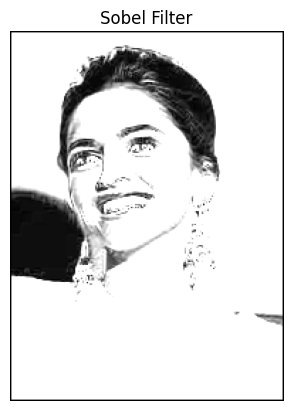

In [9]:
image = cv2.imread('/content/images (4).jpeg')

sobel_result = filter_image(image)

plt.imshow(sobel_result,cmap='gray')
plt.title('Sobel Filter')
plt.axis('off')
plt.show()

Canny Edge Detection

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
def Canny_Detector(img,lower_th=None,upper_th=None):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Noise reduction step/ blurring image ising gausian filter
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

    # setting the minimum and maximum thresholds for double thresholding
    mag_max = np.max(mag)
    if not lower_th:
      lower_th = mag_max * 0.1
    if not upper_th:
      upper_th = mag_max * 0.5

    # getting the dimensions of the input image
    height, width = img.shape

    #Non-max suppression

    #Looping through every pixel of the grayscaleimage
    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

           # selecting the neighbours of the target pixel according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(67.5):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

            # In y-axis direction
            elif grad_ang>(67.5) and grad_ang<=(112.5):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1

            # top left (diagonal-2) direction
            elif grad_ang>(112.5) and grad_ang<=(157.5):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1

            # Now it restarts the cycle
            elif grad_ang>(157.5) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue

            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0

    # double thresholding step
    ids = np.zeros_like(img)
    for i_x in range(width):
        for i_y in range(height):

            grad_mag = mag[i_y, i_x]

            if grad_mag<lower_th:
                mag[i_y, i_x]= 0
            elif upper_th>grad_mag>= lower_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
    return mag


<Figure size 1000x800 with 0 Axes>

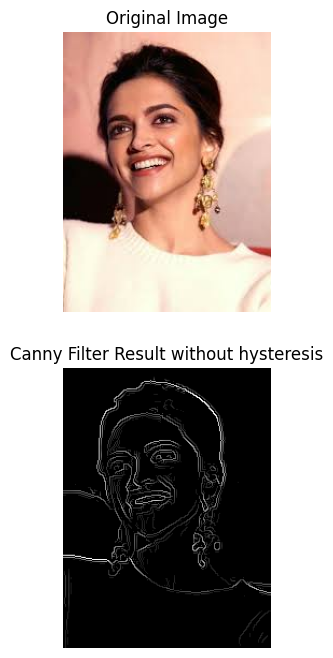

In [10]:
img=cv2.imread('/content/images (4).jpeg')
canny_img= Canny_Detector(img)

img_rgb= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
f,plots = plt.subplots(2,1, figsize=(10,8))
plots[0].imshow(img_rgb)
plots[0].set_title('Original Image')
plots[0].axis('off')

plt.imshow(canny_img, cmap='gray')
plt.title('Canny Filter Result without hysteresis')
plt.axis('off')
plt.show()